In [2]:
import pandas as pd

# Path to your pickle file
file_path = "/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_53.p"

# Load the pickle file
df = pd.read_pickle(file_path)

# Print only the column names
print("\n✅ Column Names in the Pickle File:")
print(df.columns.tolist())  # Converts to a list for better readability


✅ Column Names in the Pickle File:
['objectID', 'rcs', 'distance', 'radialVelocity', 'object_id', 'orientation', 'width_edge_mean', 'length_edge_mean', 'centroid_x', 'centroid_y', 'transformed_x', 'transformed_y', 'radialVelocityDomainMax', 'yaw_rate', 'ego_speed', 'is_valid_detection', 'angleAzimuth_sin', 'angleAzimuth_cos', 'angleElevation_sin', 'angleElevation_cos']


In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

#  Folder Paths
input_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/final_endgame_data"
output_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet"
os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

#  Define Features for DBSCAN Standardization
standardize_columns = ["distance", "radialVelocity", "rcs"]  # Use StandardScaler
angle_columns = ["angleAzimuth", "angleElevation"]  # Convert to sin/cos

#  Step 1: Compute Global Mean & Std for Standardization
all_data = {col: [] for col in standardize_columns}  # Collect data for global scaling

print("\n [INFO] Collecting Data for Global Standardization...")
for filename in tqdm(os.listdir(input_folder), desc="Processing Files"):
    if filename.endswith(".p"):  
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)

        #  Extract values for global standardization
        for col in standardize_columns:
            for values in df[col]:  
                all_data[col].extend(values)  # Flatten list-based values

#  Compute Global Mean & Std
scalers = {}
for col in standardize_columns:
    scaler = StandardScaler()
    scalers[col] = scaler.fit(np.array(all_data[col]).reshape(-1, 1))  # Fit on all data

print("\n [INFO] Standardization Parameters Computed!")

#  Step 2: Apply Standardization and Transformation
print("\n [INFO] Standardizing and Transforming Data...")
for filename in tqdm(os.listdir(input_folder), desc="Standardizing Files"):
    if filename.endswith(".p"):  
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)

        #  Apply Standardization
        for col in standardize_columns:
            df[col] = df[col].apply(lambda x: scalers[col].transform(np.array(x).reshape(-1, 1)).flatten().tolist() if isinstance(x, list) else x)

        #  Convert Angles to Sin/Cos Representation
        for col in angle_columns:
            df[f"{col}_sin"] = df[col].apply(lambda x: np.sin(np.radians(x)).tolist() if isinstance(x, list) else x)
            df[f"{col}_cos"] = df[col].apply(lambda x: np.cos(np.radians(x)).tolist() if isinstance(x, list) else x)

        #  Drop Original Angle Columns
        df.drop(columns=angle_columns, inplace=True)

        #  Save the Processed Data
        output_file_path = os.path.join(output_folder, filename)
        df.to_pickle(output_file_path)
        print(f" [SAVED] Standardized File: {output_file_path}")

print("\n🎯 [SUCCESS] Data Standardization Completed for DBSCAN!")


 [INFO] Collecting Data for Global Standardization...


Processing Files: 100%|██████████| 153/153 [02:25<00:00,  1.05it/s]



 [INFO] Standardization Parameters Computed!

 [INFO] Standardizing and Transforming Data...


Standardizing Files:   1%|          | 1/153 [00:03<08:46,  3.46s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_194.p


Standardizing Files:   1%|▏         | 2/153 [00:06<08:45,  3.48s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_218.p


Standardizing Files:   2%|▏         | 3/153 [00:07<05:21,  2.14s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_62.p


Standardizing Files:   3%|▎         | 4/153 [00:13<08:55,  3.59s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_197.p


Standardizing Files:   3%|▎         | 5/153 [00:14<06:52,  2.79s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_157.p


Standardizing Files:   4%|▍         | 6/153 [00:17<07:07,  2.91s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_141.p


Standardizing Files:   5%|▍         | 7/153 [00:19<05:49,  2.40s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_148.p


Standardizing Files:   5%|▌         | 8/153 [00:19<04:20,  1.80s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_80.p


Standardizing Files:   6%|▌         | 9/153 [00:20<03:20,  1.39s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_55.p


Standardizing Files:   7%|▋         | 10/153 [00:23<04:45,  2.00s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_210.p


Standardizing Files:   7%|▋         | 11/153 [00:24<04:16,  1.81s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_165.p


Standardizing Files:   8%|▊         | 12/153 [00:30<06:50,  2.91s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_138.p


Standardizing Files:   8%|▊         | 13/153 [00:33<07:10,  3.08s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_227.p


Standardizing Files:   9%|▉         | 14/153 [00:37<07:13,  3.12s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_144.p


Standardizing Files:  10%|▉         | 15/153 [00:38<05:57,  2.59s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_170.p


Standardizing Files:  10%|█         | 16/153 [00:38<04:29,  1.97s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_69.p


Standardizing Files:  11%|█         | 17/153 [00:42<05:15,  2.32s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_134.p


Standardizing Files:  12%|█▏        | 18/153 [00:47<07:38,  3.39s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_229.p


Standardizing Files:  12%|█▏        | 19/153 [00:49<06:12,  2.78s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_172.p


Standardizing Files:  13%|█▎        | 20/153 [00:50<05:11,  2.35s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_161.p


Standardizing Files:  14%|█▎        | 21/153 [00:53<05:41,  2.59s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_118.p


Standardizing Files:  14%|█▍        | 22/153 [00:56<06:03,  2.77s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_119.p


Standardizing Files:  15%|█▌        | 23/153 [01:00<06:26,  2.97s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_226.p


Standardizing Files:  16%|█▌        | 24/153 [01:06<08:12,  3.82s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_121.p


Standardizing Files:  16%|█▋        | 25/153 [01:06<06:02,  2.83s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_81.p


Standardizing Files:  17%|█▋        | 26/153 [01:10<06:20,  3.00s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_223.p


Standardizing Files:  18%|█▊        | 27/153 [01:13<06:26,  3.07s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_120.p


Standardizing Files:  18%|█▊        | 28/153 [01:16<06:37,  3.18s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_212.p


Standardizing Files:  19%|█▉        | 29/153 [01:17<04:56,  2.39s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_76.p


Standardizing Files:  20%|█▉        | 30/153 [01:18<04:14,  2.07s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_183.p


Standardizing Files:  20%|██        | 31/153 [01:24<06:31,  3.21s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_207.p


Standardizing Files:  21%|██        | 32/153 [01:25<04:52,  2.41s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_64.p


Standardizing Files:  22%|██▏       | 33/153 [01:26<04:09,  2.08s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_166.p


Standardizing Files:  22%|██▏       | 34/153 [01:27<03:40,  1.86s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_176.p


Standardizing Files:  23%|██▎       | 35/153 [01:31<04:33,  2.32s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_208.p


Standardizing Files:  24%|██▎       | 36/153 [01:31<03:29,  1.79s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_56.p


Standardizing Files:  24%|██▍       | 37/153 [01:35<04:22,  2.26s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_195.p


Standardizing Files:  25%|██▍       | 38/153 [01:36<03:49,  1.99s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_156.p


Standardizing Files:  25%|██▌       | 39/153 [01:37<03:24,  1.79s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_153.p


Standardizing Files:  26%|██▌       | 40/153 [01:43<05:41,  3.02s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_184.p


Standardizing Files:  27%|██▋       | 41/153 [01:47<05:52,  3.15s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_231.p


Standardizing Files:  27%|██▋       | 42/153 [01:50<05:59,  3.24s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_230.p


Standardizing Files:  28%|██▊       | 43/153 [01:51<04:54,  2.68s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_154.p


Standardizing Files:  29%|██▉       | 44/153 [01:53<04:07,  2.27s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_155.p


Standardizing Files:  29%|██▉       | 45/153 [01:58<05:53,  3.27s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_140.p


Standardizing Files:  30%|███       | 46/153 [01:59<04:22,  2.46s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_54.p


Standardizing Files:  31%|███       | 47/153 [02:00<03:44,  2.12s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_174.p


Standardizing Files:  31%|███▏      | 48/153 [02:02<03:16,  1.88s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_179.p


Standardizing Files:  32%|███▏      | 49/153 [02:05<03:54,  2.25s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_116.p


Standardizing Files:  33%|███▎      | 50/153 [02:06<03:24,  1.98s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_173.p


Standardizing Files:  33%|███▎      | 51/153 [02:09<03:58,  2.34s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_111.p


Standardizing Files:  34%|███▍      | 52/153 [02:10<03:01,  1.80s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_58.p


Standardizing Files:  35%|███▍      | 53/153 [02:16<05:03,  3.04s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_202.p


Standardizing Files:  35%|███▌      | 54/153 [02:16<03:46,  2.29s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_74.p


Standardizing Files:  36%|███▌      | 55/153 [02:19<04:08,  2.54s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_124.p


Standardizing Files:  37%|███▋      | 56/153 [02:21<03:31,  2.18s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_151.p


Standardizing Files:  37%|███▋      | 57/153 [02:24<03:57,  2.48s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_113.p


Standardizing Files:  38%|███▊      | 58/153 [02:27<04:15,  2.69s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_136.p


Standardizing Files:  39%|███▊      | 59/153 [02:28<03:12,  2.05s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_70.p


Standardizing Files:  39%|███▉      | 60/153 [02:28<02:27,  1.58s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_82.p


Standardizing Files:  40%|███▉      | 61/153 [02:29<01:55,  1.26s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_65.p


Standardizing Files:  41%|████      | 62/153 [02:31<02:39,  1.76s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_75.p


Standardizing Files:  41%|████      | 63/153 [02:35<03:15,  2.17s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_115.p


Standardizing Files:  42%|████▏     | 64/153 [02:35<02:29,  1.68s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_57.p


Standardizing Files:  42%|████▏     | 65/153 [02:36<01:56,  1.33s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_60.p


Standardizing Files:  43%|████▎     | 66/153 [02:37<01:54,  1.32s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_159.p


Standardizing Files:  44%|████▍     | 67/153 [02:40<02:47,  1.95s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_204.p


Standardizing Files:  44%|████▍     | 68/153 [02:41<02:10,  1.53s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_61.p


Standardizing Files:  45%|████▌     | 69/153 [02:44<02:48,  2.01s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_130.p


Standardizing Files:  46%|████▌     | 70/153 [02:47<03:08,  2.28s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_59.p


Standardizing Files:  46%|████▋     | 71/153 [02:50<03:27,  2.53s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_126.p


Standardizing Files:  47%|████▋     | 72/153 [02:51<02:55,  2.17s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_175.p


Standardizing Files:  48%|████▊     | 73/153 [02:53<02:33,  1.92s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_163.p


Standardizing Files:  48%|████▊     | 74/153 [02:53<01:58,  1.50s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_63.p


Standardizing Files:  49%|████▉     | 75/153 [02:57<02:40,  2.06s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_209.p


Standardizing Files:  50%|████▉     | 76/153 [03:00<03:10,  2.48s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_225.p


Standardizing Files:  50%|█████     | 77/153 [03:06<04:23,  3.47s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_128.p


Standardizing Files:  51%|█████     | 78/153 [03:09<04:19,  3.46s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_228.p


Standardizing Files:  52%|█████▏    | 79/153 [03:13<04:10,  3.39s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_131.p


Standardizing Files:  52%|█████▏    | 80/153 [03:16<04:03,  3.33s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_123.p


Standardizing Files:  53%|█████▎    | 81/153 [03:22<04:56,  4.12s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_188.p


Standardizing Files:  54%|█████▎    | 82/153 [03:25<04:38,  3.92s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_222.p


Standardizing Files:  54%|█████▍    | 83/153 [03:29<04:24,  3.77s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_206.p


Standardizing Files:  55%|█████▍    | 84/153 [03:29<03:13,  2.81s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_66.p


Standardizing Files:  56%|█████▌    | 85/153 [03:30<02:40,  2.36s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_149.p


Standardizing Files:  56%|█████▌    | 86/153 [03:34<02:53,  2.60s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_146.p


Standardizing Files:  57%|█████▋    | 87/153 [03:39<03:56,  3.58s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_220.p


Standardizing Files:  58%|█████▊    | 88/153 [03:40<02:53,  2.67s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_77.p


Standardizing Files:  58%|█████▊    | 89/153 [03:43<03:04,  2.88s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_193.p


Standardizing Files:  59%|█████▉    | 90/153 [03:45<02:32,  2.42s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_178.p


Standardizing Files:  59%|█████▉    | 91/153 [03:45<01:54,  1.85s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_84.p


Standardizing Files:  60%|██████    | 92/153 [03:46<01:28,  1.44s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_68.p


Standardizing Files:  61%|██████    | 93/153 [03:49<01:57,  1.95s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_139.p


Standardizing Files:  61%|██████▏   | 94/153 [03:52<02:17,  2.33s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_135.p


Standardizing Files:  62%|██████▏   | 95/153 [03:58<03:13,  3.34s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_129.p


Standardizing Files:  63%|██████▎   | 96/153 [03:59<02:36,  2.75s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_167.p


Standardizing Files:  63%|██████▎   | 97/153 [04:03<02:44,  2.94s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_205.p


Standardizing Files:  64%|██████▍   | 98/153 [04:06<02:45,  3.01s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_112.p


Standardizing Files:  65%|██████▍   | 99/153 [04:09<02:49,  3.14s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_214.p


Standardizing Files:  65%|██████▌   | 100/153 [04:15<03:27,  3.92s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_122.p


Standardizing Files:  66%|██████▌   | 101/153 [04:18<03:12,  3.71s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_132.p


Standardizing Files:  67%|██████▋   | 102/153 [04:19<02:20,  2.76s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_79.p


Standardizing Files:  67%|██████▋   | 103/153 [04:20<01:56,  2.32s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_150.p


Standardizing Files:  68%|██████▊   | 104/153 [04:23<02:05,  2.57s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_143.p


Standardizing Files:  69%|██████▊   | 105/153 [04:24<01:45,  2.20s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_168.p


Standardizing Files:  69%|██████▉   | 106/153 [04:28<02:00,  2.57s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_189.p


Standardizing Files:  70%|██████▉   | 107/153 [04:34<02:45,  3.59s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_221.p


Standardizing Files:  71%|███████   | 108/153 [04:35<02:11,  2.92s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_164.p


Standardizing Files:  71%|███████   | 109/153 [04:36<01:36,  2.20s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_71.p


Standardizing Files:  72%|███████▏  | 110/153 [04:36<01:12,  1.69s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_73.p


Standardizing Files:  73%|███████▎  | 111/153 [04:40<01:32,  2.19s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_187.p


Standardizing Files:  73%|███████▎  | 112/153 [04:41<01:19,  1.94s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_160.p


Standardizing Files:  74%|███████▍  | 113/153 [04:44<01:31,  2.30s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_117.p


Standardizing Files:  75%|███████▍  | 114/153 [04:47<01:40,  2.57s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_137.p


Standardizing Files:  75%|███████▌  | 115/153 [04:53<02:16,  3.59s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_191.p


Standardizing Files:  76%|███████▌  | 116/153 [04:57<02:11,  3.55s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_196.p


Standardizing Files:  76%|███████▋  | 117/153 [05:00<02:04,  3.45s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_114.p


Standardizing Files:  77%|███████▋  | 118/153 [05:03<02:00,  3.44s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_211.p


Standardizing Files:  78%|███████▊  | 119/153 [05:09<02:23,  4.21s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_201.p


Standardizing Files:  78%|███████▊  | 120/153 [05:13<02:11,  3.99s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_217.p


Standardizing Files:  79%|███████▉  | 121/153 [05:16<02:00,  3.75s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_133.p


Standardizing Files:  80%|███████▉  | 122/153 [05:17<01:33,  3.03s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_171.p


Standardizing Files:  80%|████████  | 123/153 [05:19<01:15,  2.52s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_169.p


Standardizing Files:  81%|████████  | 124/153 [05:22<01:18,  2.70s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_145.p


Standardizing Files:  82%|████████▏ | 125/153 [05:28<01:40,  3.61s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_147.p


Standardizing Files:  82%|████████▏ | 126/153 [05:31<01:36,  3.56s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_203.p


Standardizing Files:  83%|████████▎ | 127/153 [05:34<01:31,  3.53s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_198.p


Standardizing Files:  84%|████████▎ | 128/153 [05:35<01:05,  2.64s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_83.p


Standardizing Files:  84%|████████▍ | 129/153 [05:38<01:08,  2.85s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_216.p


Standardizing Files:  85%|████████▍ | 130/153 [05:44<01:26,  3.76s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_224.p


Standardizing Files:  86%|████████▌ | 131/153 [05:48<01:20,  3.67s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_185.p


Standardizing Files:  86%|████████▋ | 132/153 [05:51<01:15,  3.60s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_215.p


Standardizing Files:  87%|████████▋ | 133/153 [05:55<01:10,  3.55s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_199.p


Standardizing Files:  88%|████████▊ | 134/153 [06:01<01:21,  4.29s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_213.p


Standardizing Files:  88%|████████▊ | 135/153 [06:04<01:12,  4.04s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_186.p


Standardizing Files:  89%|████████▉ | 136/153 [06:05<00:54,  3.23s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_158.p


Standardizing Files:  90%|████████▉ | 137/153 [06:06<00:38,  2.42s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_78.p


Standardizing Files:  90%|█████████ | 138/153 [06:07<00:31,  2.09s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_181.p


Standardizing Files:  91%|█████████ | 139/153 [06:11<00:34,  2.48s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_190.p


Standardizing Files:  92%|█████████▏| 140/153 [06:14<00:35,  2.76s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_219.p


Standardizing Files:  92%|█████████▏| 141/153 [06:20<00:44,  3.75s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_200.p


Standardizing Files:  93%|█████████▎| 142/153 [06:21<00:33,  3.03s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_182.p


Standardizing Files:  93%|█████████▎| 143/153 [06:23<00:25,  2.52s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_162.p


Standardizing Files:  94%|█████████▍| 144/153 [06:23<00:17,  1.92s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_67.p


Standardizing Files:  95%|█████████▍| 145/153 [06:25<00:13,  1.73s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_177.p


Standardizing Files:  95%|█████████▌| 146/153 [06:26<00:11,  1.61s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_152.p


Standardizing Files:  96%|█████████▌| 147/153 [06:29<00:12,  2.15s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_192.p


Standardizing Files:  97%|█████████▋| 148/153 [06:30<00:08,  1.67s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_53.p


Standardizing Files:  97%|█████████▋| 149/153 [06:31<00:06,  1.56s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_180.p


Standardizing Files:  98%|█████████▊| 150/153 [06:37<00:08,  2.74s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_125.p


Standardizing Files:  99%|█████████▊| 151/153 [06:40<00:05,  2.89s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_127.p


Standardizing Files:  99%|█████████▉| 152/153 [06:40<00:02,  2.18s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_72.p


Standardizing Files: 100%|██████████| 153/153 [06:44<00:00,  2.64s/it]

 [SAVED] Standardized File: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_v_DataSet/combined_142.p

🎯 [SUCCESS] Data Standardization Completed for DBSCAN!


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Folder Paths
input_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/conv_DataSet"  # Update this with your actual folder path
output_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/std_DataSet"  # Update this with your actual output folder path
os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

# Define columns
standardize_columns = ["distance", "radialVelocity", "rcs"]  # Use StandardScaler
angle_columns = ["angleAzimuth", "angleElevation"]  # Use sin/cos transformation

# Step 1: Compute Global Mean & Std for StandardScaler Columns
all_data = []
for filename in os.listdir(input_folder):
    if filename.endswith(".p"):  
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)

        # Flatten list-based numerical values and store them for global standardization
        for col in standardize_columns:
            all_data.extend([val for sublist in df[col] for val in sublist])  

# Compute global mean & std using StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(all_data).reshape(-1, 1))  # Fit on entire dataset

# Process Each File Sequentially
for filename in os.listdir(input_folder):
    if filename.endswith(".p"):  
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)

        # Apply Standardization
        for col in standardize_columns:
            df[col] = df[col].apply(lambda x: scaler.transform(np.array(x).reshape(-1, 1)).flatten().tolist() if isinstance(x, list) else x)

        # Convert angle columns using sin/cos transformation
        for col in angle_columns:
            df[f"{col}_sin"] = df[col].apply(lambda x: np.sin(np.radians(x)).tolist() if isinstance(x, list) else x)
            df[f"{col}_cos"] = df[col].apply(lambda x: np.cos(np.radians(x)).tolist() if isinstance(x, list) else x)

        # Remove original angle columns (optional, if we no longer need them)
        df.drop(columns=angle_columns, inplace=True)

        # Save the processed DataFrame
        output_file_path = os.path.join(output_folder, filename)
        df.to_pickle(output_file_path)
        print(f"✅ Standardized and saved: {output_file_path}")

print("\n Hybrid standardization completed using a single core.")

In [2]:
import pandas as pd

# Set the path to your pickle file
file_path = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/final_cleaned_data/combined_18.p"  # Replace this with your actual file path

# Load the pickle file
df = pd.read_pickle(file_path)

# Display the first few rows
print("Dataframe Loaded Successfully!")
print(df.head())

# Display column names
print("\nColumns in DataFrame:")
print(df.columns)

# Display the data types of each column
print("\nColumn Data Types:")
print(df.dtypes)

# Check if any columns have missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataframe Loaded Successfully!
      timestamp                                                rcs  \
5  2.740820e+07  [-19, -27, -33, -27, -3, -12, -28, -26, -31, -...   
6  2.740820e+07  [-19, -19, -26, -27, -3, -11, -28, -26, -31, -...   
7  2.740820e+07  [-18, -27, -27, -10, -3, -11, -28, -25, -31, -...   
8  2.740820e+07  [-20, -28, -27, -28, -3, -12, -28, -26, -31, -...   
9  2.740820e+07  [-18, -27, -27, -3, -11, -26, -31, -28, -28, -...   

                                            distance  \
5  [2.1399999, 2.6699998, 2.76, 3.07, 3.6899998, ...   
6  [1.64, 2.1699998, 2.71, 3.01, 3.6899998, 4.029...   
7  [2.19, 2.6299999, 3.08, 3.37, 3.6899998, 4.029...   
8  [2.19, 2.69, 3.03, 3.35, 3.6999998, 4.04, 4.23...   
9  [2.1299999, 2.6299999, 3.03, 3.6999998, 4.0299...   

                                        angleAzimuth  \
5  [0.29295364, 0.013456495, 0.15817927, -0.04508...   
6  [0.7550298, 0.29138285, 0.014974931, -0.045081...   
7  [0.29269186, 0.015184372, -0.045448393, 

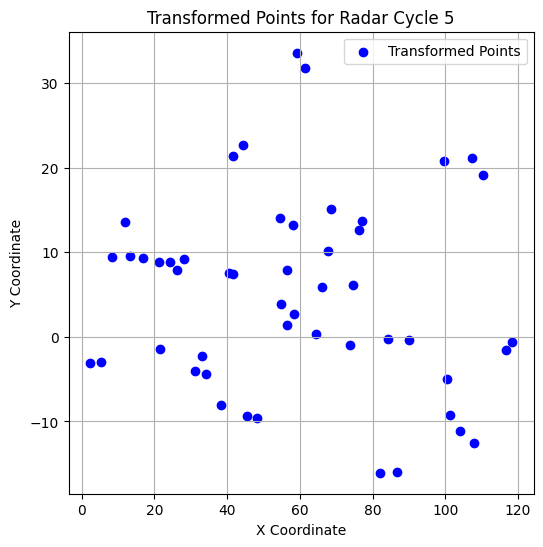

Extracted X Coordinates: [  2.16599965   8.34599948  13.28599906  16.91600013  21.21599936
  24.17599845  26.31599975  28.02599883  31.03599906  40.37599921
  21.60599875   5.21599936  11.81599975  32.97599769  34.28599906
  38.2659986   41.50600028  41.72599769  44.24599814  45.35599875
  48.2659986   54.61599708  54.93599677  56.3359983   56.43599677
  58.06599784  58.45599723  59.23599982  61.50599647  64.3359983
  66.16600013  67.74600196  68.52600074  73.72599769  74.68599677
  76.14599586  77.09600043  81.94599891  84.23599982  86.80599952
  90.07599616  99.63599372 100.34600043 101.35599494 103.92599463
 107.3359983  107.98599982 110.41600013 116.8359983  118.46599555]
Extracted Y Coordinates: [ -3.08999985   9.49999982   9.58999997   9.36999971   8.89999944
   8.80000001   7.94999963   9.15999967  -4.0800001    7.53000003
  -1.40999991  -2.98999995  13.57999974  -2.23999995  -4.33999985
  -8.06999987  21.34999925   7.42999965  22.73000032  -9.30999964
  -9.62999934  14.01999933

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Select a single row (change index if needed)
index = 5  # Choose an index that contains valid data
row = df.iloc[index]

# Extract transformed coordinates
x_vals = row["transformed_x"]
y_vals = row["transformed_y"]

# Ensure data is numerical
x_vals = np.array(x_vals, dtype=float)
y_vals = np.array(y_vals, dtype=float)

# Plot transformed points
plt.figure(figsize=(6, 6))
plt.scatter(x_vals, y_vals, color='blue', label='Transformed Points', marker='o')

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title(f"Transformed Points for Radar Cycle {index}")
plt.legend()
plt.grid(True)
plt.show()

# Print extracted values for debugging
print(f"Extracted X Coordinates: {x_vals}")
print(f"Extracted Y Coordinates: {y_vals}")

In [4]:
# Extract additional attributes
width_vals = row["width_edge_mean"]
length_vals = row["length_edge_mean"]
orientation_vals = row["orientation"]

# Convert to numpy arrays
width_vals = np.array(width_vals, dtype=float)
length_vals = np.array(length_vals, dtype=float)
orientation_vals = np.array(orientation_vals, dtype=float)

# Print extracted values
print(f"Extracted Widths: {width_vals}")
print(f"Extracted Lengths: {length_vals}")
print(f"Extracted Orientations (radians): {orientation_vals}")

# Convert orientation to degrees for better readability
orientation_deg = np.degrees(orientation_vals)
print(f"Extracted Orientations (degrees): {orientation_deg}")

Extracted Widths: [0.20999999 0.25999999 0.07       0.07       0.26999998 0.17
 0.65999997 1.5        0.74000001 1.24000001 0.77999997 1.30999994
 0.09999999 0.61000001 0.95999998 0.44999999 0.25       0.70999998
 0.23999999 0.09       0.22       1.77999997 0.74000001 0.39999998
 0.59999996 1.56999993 0.52999997 0.17       0.25       0.63999999
 2.06999993 0.22       0.32999998 0.19999999 3.11999989 4.57999992
 4.19999981 0.25       1.23000002 0.47       0.85999995 0.22999999
 1.44999993 1.12       0.25999999 0.47999999 0.81       0.65999997
 3.57999992 2.25      ]
Extracted Lengths: [0.29999998 1.75999999 1.32999992 2.25       2.15999985 2.44000006
 0.35999998 2.56999993 1.38999999 1.78999996 0.85999995 3.32999992
 1.10000002 0.45999998 1.92999995 0.95999998 0.94999999 3.07999992
 0.23999999 1.25       0.25999999 2.14999986 2.38999987 0.47999999
 1.73000002 4.71000004 0.83999997 1.48000002 0.25       1.53999996
 2.24000001 0.22999999 0.34999999 0.41       0.69999999 1.61000001
 3.9099

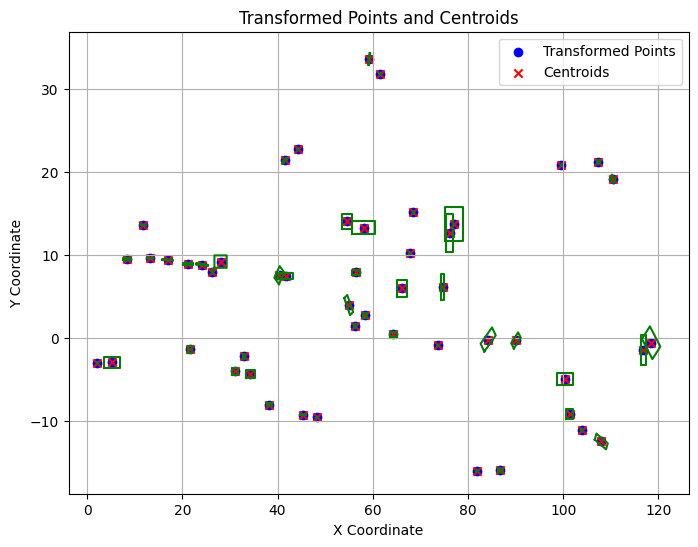

In [5]:
from shapely.geometry import Polygon
from shapely.affinity import rotate

# Compute centroids
centroid_x_vals = []
centroid_y_vals = []

for obj_x, obj_y, length, width, orientation in zip(x_vals, y_vals, length_vals, width_vals, orientation_vals):
    orientation_deg = np.degrees(orientation)  # Convert to degrees

    # Define bounding box (starting from the center)
    poly = Polygon([
        (obj_x - length / 2, obj_y - width / 2),
        (obj_x + length / 2, obj_y - width / 2),
        (obj_x + length / 2, obj_y + width / 2),
        (obj_x - length / 2, obj_y + width / 2)
    ])

    # Rotate the bounding box around its center
    rotated_poly = rotate(poly, orientation_deg, origin='centroid')

    # Extract centroid coordinates
    centroid_x_vals.append(rotated_poly.centroid.x)
    centroid_y_vals.append(rotated_poly.centroid.y)

# Plot transformed points
plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, color='blue', label='Transformed Points', marker='o')
plt.scatter(centroid_x_vals, centroid_y_vals, color='red', label='Centroids', marker='x')

# Draw bounding boxes
for obj_x, obj_y, length, width, orientation in zip(x_vals, y_vals, length_vals, width_vals, orientation_vals):
    orientation_deg = np.degrees(orientation)
    poly = Polygon([
        (obj_x - length / 2, obj_y - width / 2),
        (obj_x + length / 2, obj_y - width / 2),
        (obj_x + length / 2, obj_y + width / 2),
        (obj_x - length / 2, obj_y + width / 2)
    ])
    rotated_poly = rotate(poly, orientation_deg, origin='centroid')

    x_poly, y_poly = rotated_poly.exterior.xy
    plt.plot(x_poly, y_poly, color='green')

# Plot aesthetics
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Transformed Points and Centroids")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import rotate

# *1. Load the Pickle File*
file_path = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/final_centroid_data/combined_100.p"   # Replace with your actual path

# Load DataFrame
df = pd.read_pickle(file_path)
print("✅ Pickle file loaded successfully!")

# *2. Select One Radar Cycle (Modify the Index as Needed)*
index = 5  # Choose an index that contains valid data
row = df.iloc[index]

# *3. Extract and Verify Data*
x_vals = row["transformed_x"]
y_vals = row["transformed_y"]
width_vals = row["width_edge_mean"]
length_vals = row["length_edge_mean"]
orientation_vals = row["orientation"]
reference_points = row["reference_point"]

# *Ensure all data is in the correct format*
x_vals = np.array(x_vals, dtype=float)
y_vals = np.array(y_vals, dtype=float)
width_vals = np.array(width_vals, dtype=float)
length_vals = np.array(length_vals, dtype=float)
orientation_vals = np.array(orientation_vals, dtype=float)

# *Check Reference Point Format*
if isinstance(reference_points, list):
    try:
        reference_points = [rp[0] if isinstance(rp, tuple) else rp for rp in reference_points]
    except:
        print("❌ Error extracting reference points!")
else:
    print("❌ Reference points are not in list format!")

print(f"✅ Extracted {len(x_vals)} objects with valid attributes!")

# *4. Compute Centroids with Correct Reference Point Adjustments*
centroid_x_vals = []
centroid_y_vals = []

for obj_x, obj_y, length, width, orientation, ref_point in zip(
        x_vals, y_vals, length_vals, width_vals, orientation_vals, reference_points):

    orientation_deg = np.degrees(orientation)  # Convert to degrees

    # *Adjust bounding box placement based on reference point*
    if ref_point == 0:  # Rear Left
        bbox_x, bbox_y = obj_x, obj_y
    elif ref_point == 1:  # Rear Center
        bbox_x, bbox_y = obj_x - length / 2, obj_y
    elif ref_point == 2:  # Rear Right
        bbox_x, bbox_y = obj_x - length, obj_y
    elif ref_point == 3:  # Center Rear
        bbox_x, bbox_y = obj_x, obj_y + width / 2
    else:  # Default (Center-based)
        bbox_x, bbox_y = obj_x, obj_y

    # *Create Bounding Box*
    poly = Polygon([
        (bbox_x, bbox_y),
        (bbox_x + length, bbox_y),
        (bbox_x + length, bbox_y + width),
        (bbox_x, bbox_y + width)
    ])

    # *Rotate the bounding box*
    rotated_poly = rotate(poly, orientation_deg, origin='centroid')

    # *Extract Centroid*
    centroid_x_vals.append(rotated_poly.centroid.x)
    centroid_y_vals.append(rotated_poly.centroid.y)

# *5. Plot Results*
plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, color='blue', label='Transformed Points', marker='o')
plt.scatter(centroid_x_vals, centroid_y_vals, color='red', label='Centroids', marker='x')

# *Plot Bounding Boxes*
for obj_x, obj_y, length, width, orientation, ref_point in zip(
        x_vals, y_vals, length_vals, width_vals, orientation_vals, reference_points):

    orientation_deg = np.degrees(orientation)
    poly = Polygon([
        (obj_x, obj_y),
        (obj_x + length, obj_y),
        (obj_x + length, obj_y + width),
        (obj_x, obj_y + width)
    ])
    rotated_poly = rotate(poly, orientation_deg, origin='centroid')

    x_poly, y_poly = rotated_poly.exterior.xy
    plt.plot(x_poly, y_poly, color='green')

# *Final Plot Adjustments*
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Transformed Points, Bounding Boxes, and Centroids")
plt.legend()
plt.grid(True)
plt.show()

✅ Pickle file loaded successfully!


KeyError: 'transformed_x'

✅ Pickle file loaded successfully!
✅ Extracted 33 objects with valid attributes!


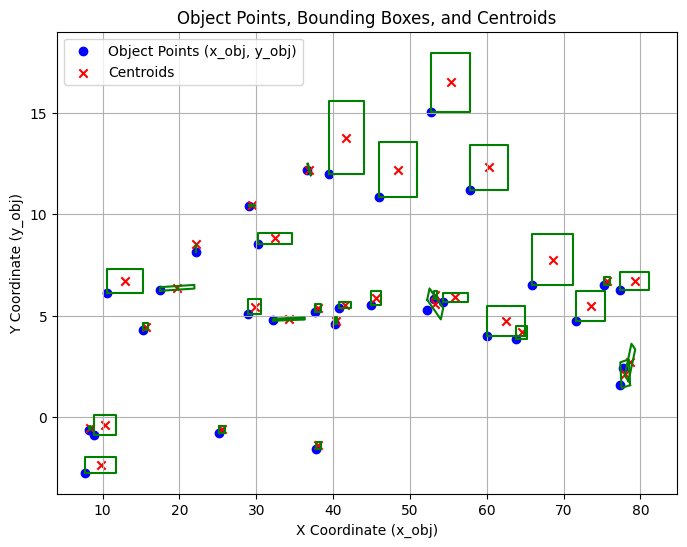

In [3]:
# new logic

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import rotate

# 1. Load the Pickle File
file_path = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/final_centroid_data/combined_100.p"   # Replace with your actual path

# Load DataFrame
df = pd.read_pickle(file_path)
print("✅ Pickle file loaded successfully!")

# 2. Select One Radar Cycle (Modify the Index as Needed)
index = 4  # Choose an index that contains valid data
row = df.iloc[index]

# 3. Extract and Verify Data
x_vals = row["x_obj"]
y_vals = row["y_obj"]
width_vals = row["width_edge_mean"]
length_vals = row["length_edge_mean"]
orientation_vals = row["orientation"]
reference_points = row["reference_point"]

# Ensure all data is in the correct format
x_vals = np.array(x_vals, dtype=float)
y_vals = np.array(y_vals, dtype=float)
width_vals = np.array(width_vals, dtype=float)
length_vals = np.array(length_vals, dtype=float)
orientation_vals = np.array(orientation_vals, dtype=float)

# Check Reference Point Format
if isinstance(reference_points, list):
    try:
        reference_points = [rp[0] if isinstance(rp, tuple) else rp for rp in reference_points]
    except:
        print("❌ Error extracting reference points!")
else:
    print("❌ Reference points are not in list format!")

print(f"✅ Extracted {len(x_vals)} objects with valid attributes!")

# 4. Compute Centroids with Correct Reference Point Adjustments
centroid_x_vals = []
centroid_y_vals = []

for obj_x, obj_y, length, width, orientation, ref_point in zip(
        x_vals, y_vals, length_vals, width_vals, orientation_vals, reference_points):

    orientation_deg = np.degrees(orientation)  # Convert to degrees

    # Adjust bounding box placement based on reference point
    if ref_point == 0:  # Rear Left
        bbox_x, bbox_y = obj_x, obj_y
    elif ref_point == 1:  # Rear Center
        bbox_x, bbox_y = obj_x - length / 2, obj_y
    elif ref_point == 2:  # Rear Right
        bbox_x, bbox_y = obj_x - length, obj_y
    elif ref_point == 3:  # Center Rear
        bbox_x, bbox_y = obj_x, obj_y + width / 2
    else:  # Default (Center-based)
        bbox_x, bbox_y = obj_x, obj_y

    # Create Bounding Box
    poly = Polygon([
        (bbox_x, bbox_y),
        (bbox_x + length, bbox_y),
        (bbox_x + length, bbox_y + width),
        (bbox_x, bbox_y + width)
    ])

    # Rotate the bounding box
    rotated_poly = rotate(poly, orientation_deg, origin='centroid')

    # Extract Centroid
    centroid_x_vals.append(rotated_poly.centroid.x)
    centroid_y_vals.append(rotated_poly.centroid.y)

# 5. Plot Results
plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, color='blue', label='Object Points (x_obj, y_obj)', marker='o')
plt.scatter(centroid_x_vals, centroid_y_vals, color='red', label='Centroids', marker='x')

# Plot Bounding Boxes
for obj_x, obj_y, length, width, orientation, ref_point in zip(
        x_vals, y_vals, length_vals, width_vals, orientation_vals, reference_points):

    orientation_deg = np.degrees(orientation)
    poly = Polygon([
        (obj_x, obj_y),
        (obj_x + length, obj_y),
        (obj_x + length, obj_y + width),
        (obj_x, obj_y + width)
    ])
    rotated_poly = rotate(poly, orientation_deg, origin='centroid')

    x_poly, y_poly = rotated_poly.exterior.xy
    plt.plot(x_poly, y_poly, color='green')

# Final Plot Adjustments
plt.xlabel("X Coordinate (x_obj)")
plt.ylabel("Y Coordinate (y_obj)")
plt.title("Object Points, Bounding Boxes, and Centroids")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
vd = pd.read_pickle("/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/tunning_data/combined_118.p")
len(vd)

338

In [7]:
vd.head(5)

,objectID,rcs,distance,radialVelocity,object_id,orientation,width_edge_mean,length_edge_mean,centroid_x,centroid_y,transformed_x,transformed_y,radialVelocityDomainMax,yaw_rate,ego_speed,is_valid_detection,angleAzimuth_sin,angleAzimuth_cos,angleElevation_sin,angleElevation_cos
0,"[1915, 1915, 971, 1915, 971, 0, 1915, 971, 0, ...","[-0.4676515544424469, -0.8458516128695145, -0....","[-1.2885891199111938, -1.2866606712341309, -1....","[1.070237159729004, 1.0484516620635986, 1.0286...",[2104],[-3.0630686],[1.39],[4.39],[266.19097900390625],[1.0550000034272706],[263.99597907066345],[0.36000001057982445],27.573689,0.104996,26.453125,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.015561369247734547, -0.014888850972056389,...","[0.9998789429664612, 0.9998891353607178, 0.999...","[0.00032533155172131956, -8.224674093071371e-0...","[0.9999999403953552, 1.0, 0.999997079372406, 1..."
1,"[1915, 1915, 1915, 1915, 1915, 0, 1915, 1915, ...","[-0.4676515544424469, -0.7702116011841009, -1....","[-1.2920011281967163, -1.2899243831634521, -1....","[1.101142406463623, 1.071250557899475, 1.05706...",[2104],[-3.0638359],[1.48],[4.8599997],[265.4259788990023],[1.0200000219047098],[262.99597907066345],[0.2800000123679638],25.904442,0.104996,26.453125,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.016615817323327065, -0.015755081549286842,...","[0.9998619556427002, 0.9998759031295776, 0.999...","[0.00023120472906157374, -0.000743876036722213...","[1.0, 0.9999997019767761, 0.9999995231628418, ..."
2,"[1915, 1915, 1915, 1915, 1915, 0, 1915, 1915, ...","[-0.3920115427570333, -0.6189315778132739, 0.6...","[-1.2942264080047607, -1.292891263961792, -1.2...","[1.1487665176391602, 1.120901346206665, 1.1031...",[2104],[-3.076108],[1.73],[5.3599997],[264.5559837818148],[1.3050000220537186],[261.87598395347595],[0.4400000125169754],24.401609,0.104996,26.578125,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.018222127109766006, -0.017430856823921204,...","[0.9998339414596558, 0.9998480677604675, 0.999...","[0.00023120472906157374, 0.0001023514996632002...","[1.0, 1.0, 0.9999862909317017, 1.0, 0.99999892..."
3,"[1915, 1915, 0, 0, 0, 1915, 0, 971, 1915, 971,...","[-0.9971316362403415, -1.4509717063528227, -1....","[-1.2939295768737793, -1.2857705354690552, -1....","[1.1371138095855713, 1.01197350025177, 0.96536...",[2104],[-3.087709],[1.52],[5.2999997],[263.45600700378435],[1.3199999928474426],[260.8060071468353],[0.5600000023841858],27.753181,0.145004,26.968750,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.01808415912091732, -0.014246480539441109, ...","[0.9998364448547363, 0.9998984932899475, 0.999...","[-0.0002412571047898382, 0.0001608380698598921...","[1.0, 1.0, 0.9999995231628418, 0.9999947547912..."
4,"[1915, 0, 1915, 1915, 1915, 1915, 1915, 1915, ...","[-0.7702116011841009, -2.056091799836131, -0.7...","[-1.2888859510421753, -1.2810235023498535, -1....","[1.0459184646606445, 0.9972808361053467, 0.948...",[2104],[-3.0985432],[1.9799999],[5.2799997],[262.15599846839893],[1.5799999535083742],[259.51599860191345],[0.5900000035762787],26.000765,0.104996,27.156250,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.015439840964972973, -0.013655276037752628,...","[0.9998807907104492, 0.9999067783355713, 0.999...","[0.00014895798813086003, -0.001049102633260190...","[1.0, 0.999999463558197, 1.0, 0.99999189376831..."


In [13]:
vpd = pd.read_pickle("/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/grouped_data/combined_54.p")
vpd.head(5)

,features,scalars,labels
0,"[-0.9214916245549281, 0.13686850666999817, -0....","[-0.25637329330851066, -0.8937637072574967, -1...","[99.92099738121033, -1.5149999260902405, 0.25,..."
1,"[0.39275357847913195, -0.6221814304590225, 0.1...","[-0.38868177287173805, 0.7326230177107833, -1....","[48.99599799513817, 2.709999918937683, 1.19999..."
2,"[0.24336455540044027, -0.6283897042274476, 0.1...","[-1.4373277724941775, 0.8487821027203979, -1.4...","[48.50099799036979, 2.719999909400938, 1.19999..."
3,"[0.3549335726364252, -0.6317683011293411, 0.14...","[1.1665631204609248, 0.6861452028328329, -1.46...","[48.220997840166106, 2.699999928474426, 1.1999..."
4,"[0.19798054838919216, -0.6396640062332153, 0.1...","[0.41514732883330074, 0.6629240214864885, -1.4...","[47.80100011825561, 2.849999904632571, 1.19999..."


In [1]:
import os
import pandas as pd

# Folder path where the dataset is stored
augmented_folder = "/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/final_endgame_data"

# Get a sample file (first .p file in the folder)
sample_file = None
for filename in os.listdir(augmented_folder):
    if filename.endswith(".p"):  # Look for a .p (pickle) file
        sample_file = os.path.join(augmented_folder, filename)
        break  # Take the first available file

# Load and print the first five rows if a file is found
if sample_file:
    df_sample = pd.read_pickle(sample_file)  # Load pickle file into a Pandas DataFrame
    print(f"📂 Loaded file: {sample_file}")
    print("\n📊 First 5 Rows of the Dataset:\n")
    print(df_sample.head())  # Display the first five rows
else:
    print("⚠ No .p files found in the specified folder.")

📂 Loaded file: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/final_endgame_data/combined_194.p

📊 First 5 Rows of the Dataset:

                                            objectID  \
0  [205, 205, 205, 205, 205, 205, 205, 205, 205, ...   
1  [205, 205, 205, 205, 205, 205, 205, 205, 205, ...   
2  [205, 205, 205, 205, 205, 205, 205, 205, 205, ...   
3  [205, 205, 205, 205, 205, 205, 205, 398, 398, ...   
4  [205, 205, 205, 205, 205, 398, 398, 398, 200, ...   

                                                 rcs  \
0  [-13, -10, -11, -14, -12, -24, -18, 1, 6, -14,...   
1  [-11, -13, 14, 15, -23, 12, -18, -9, -16, 8, 0...   
2  [-11, 2, -10, 10, 10, 4, 5, -11, -20, -22, -22...   
3  [-9, -11, -4, -14, -17, -13, -13, 11, 24, -13,...   
4  [-12, -8, -15, -8, -10, 27, -5, -16, 20, 4, -8...   

                                            distance  \
0  [4.31, 4.37, 4.93, 5.13, 5.6099997, 5.81, 6.42...   
1  [4.24, 4.5099998, 4.74, 4.85, 4.94, 6.47, 6.6,...   
2  [4.1, 4.31999